In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from random import randrange

from sklearn.metrics import confusion_matrix, classification_report

# Data Training 

In [76]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
df = pd.read_csv(r"C:\Users\Allan\Desktop\Artificial-Neural-Network\Single-Layer-Perceptron\data\train_data_cl.csv", header=None, names=list(range(13)))

df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NaN
1,1,0,3,Braund,Mr. Owen Harris,male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38,1,0,PC 17599,712.833,C85,C
3,3,1,3,Heikkinen,Miss. Laina,female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35,1,0,113803,53.1,C123,S


### Data Preprocessing

In [77]:
### Benerin column
col_name = df.iloc[0,:12].values
col_name = np.insert(col_name, 4, "FirstName")

df.columns = col_name
df = df.drop(0).reset_index(drop=True)

df.head()
### Merge Name dan FirstName
df["Name"] = df["FirstName"] + " " + df["Name"]
df = df.drop("FirstName", axis=1)
df
### Perbaikan data yang tidak sesuai

print(df['Sex'].unique().tolist())
true_sex_val = ['male', 'female']
count = 0
for val in df["Sex"].values:
    if val not in true_sex_val:
        df.loc[count, 'Sex'] = np.random.choice(true_sex_val)
    count += 1
print(df['Sex'].unique().tolist())

count = 0
for val in df['Fare'].values:
    try:
        float(val)
    except ValueError:
        df.loc[count, 'Fare'] = 0
    count += 1

count = 0
for val in df['Parch'].values:
    if len(val) > 1:
        df.loc[count, 'Parch'] = 0
    count += 1

['male', 'female', '15', '27', '9', '36.5', '16', '40', '45', '24', '18', '20.5', '8', '26', '3', '1', '19', '21', '36', '22', '48', '49', '35', '39', '6']
['male', 'female']


In [78]:
### Encode
lbenc = LabelEncoder()

for i in df.columns.values:
    if df[i].dtypes == 'string':
        df[i] = lbenc.fit_transform(df[i])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris Braund,male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cu...,female,38,1,0,PC 17599,712.833,C85,C
2,3,1,3,Miss. Laina Heikkinen,female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,113803,53.1,C123,S
4,5,0,3,Mr. William Henry Allen,male,35,0,0,373450,8.05,NaN,S


In [79]:
### Change Data Type
df.info()
df = df.astype({'PassengerId': 'int64', 'Survived': 'int64', 'Pclass': 'int64', 'SibSp': 'int64', 'Parch': 'int64'})
df = df.astype({'Name': 'string', 'Sex': 'string', 'Ticket': 'string', 'Cabin': 'string', 'Embarked': 'string'})
df = df.astype({'Age': 'float64', 'Fare': 'float64'})
df.info()
### Menghilangkan Column yang tidak dipakai
del df['Name']
del df['Ticket']
del df['Cabin']
### Cek & Replace Missing Value
missing = pd.DataFrame({
    'total' : df.isnull().sum(),
    'percent' : df.isnull().sum()/df.shape[0] * 100})

missing
df['Embarked'] = df['Embarked'].fillna(value=np.random.choice(df['Embarked'].unique().tolist()))
df['Fare'] = df['Fare'].fillna(value=0)
df.isna().sum()
clean_data = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  712 non-null    object
 1   Survived     712 non-null    object
 2   Pclass       712 non-null    object
 3   Name         712 non-null    object
 4   Sex          712 non-null    object
 5   Age          712 non-null    object
 6   SibSp        712 non-null    object
 7   Parch        712 non-null    object
 8   Ticket       712 non-null    object
 9   Fare         685 non-null    object
 10  Cabin        210 non-null    object
 11  Embarked     677 non-null    object
dtypes: object(12)
memory usage: 66.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   P

In [80]:
## Encode
lbenc = LabelEncoder()

for i in df.columns.values:
    if df[i].dtypes == 'string':
        df[i] = lbenc.fit_transform(df[i])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.250,2
1,2,1,1,0,38.0,1,0,712.833,0
2,3,1,3,0,26.0,0,0,7.925,2
3,4,1,1,0,35.0,1,0,53.100,2
4,5,0,3,1,35.0,0,0,8.050,2


In [81]:
### Split Feature and Label
train = df.copy()
x_train = train.iloc[:, 2:].values
y_train = train.iloc[:, 1].values
train

### Normalisasi

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns.astype(str))
df_normalized

### Split Feature and Label
train_normalized = df_normalized.copy()
x_train_normalized = train_normalized.iloc[:, 2:].values
y_train_normalized = train_normalized.iloc[:, 1].values
train_normalized = pd.DataFrame(train_normalized, columns=train_normalized.columns)

id_column = df['PassengerId']
train_normalized = train_normalized.drop(columns=['PassengerId'])
train_normalized.insert(0, 'PassengerId', id_column)
train_normalized

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,1.0,1.0,0.2750,0.2,0.000000,0.007960,1.0
1,2,1.0,0.0,0.0,0.4750,0.2,0.000000,0.782652,0.0
2,3,1.0,1.0,0.0,0.3250,0.0,0.000000,0.008701,1.0
3,4,1.0,0.0,0.0,0.4375,0.2,0.000000,0.058301,1.0
4,5,0.0,1.0,1.0,0.4375,0.0,0.000000,0.008838,1.0
...,...,...,...,...,...,...,...,...,...
707,886,0.0,1.0,0.0,0.4875,0.0,0.833333,0.031978,0.5
708,887,0.0,0.5,1.0,0.3375,0.0,0.000000,0.014273,1.0
709,888,1.0,0.0,0.0,0.2375,0.0,0.000000,0.032938,1.0
710,890,1.0,0.0,1.0,0.3250,0.0,0.000000,0.032938,0.0


# Data Training v2

In [82]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
df_v2 = pd.read_csv(r"C:\Users\Allan\Desktop\Artificial-Neural-Network\Single-Layer-Perceptron\data\train_data_cl_v2.csv")
df_v2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Preprocessing

In [83]:
del df_v2['Name']
del df_v2['Ticket']
del df_v2['Cabin']

missing = pd.DataFrame({
    'total' : df_v2.isnull().sum(),
    'percent' : df_v2.isnull().sum()/df_v2.shape[0] * 100})

lbenc = LabelEncoder()

for i in df_v2.columns.values:
    if df_v2[i].dtypes == 'object':
        df_v2[i] = lbenc.fit_transform(df[i])

df_v2.head()

train_v2 = df_v2.copy()
x_train_v2 = train_v2.iloc[:, 2:].values
y_train_v2 = df_v2.iloc[:, 1].values
train_v2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
707,886,0,3,0,39.0,0,5,29.1250,1
708,887,0,2,1,27.0,0,0,13.0000,2
709,888,1,1,0,19.0,0,0,30.0000,2
710,890,1,1,1,26.0,0,0,30.0000,0


In [84]:
feature_v2 = x_train_v2.copy()
label_v2 = y_train_v2.copy()
label_v2 = label_v2.reshape(-1,1)
passengerId_v2 = train_v2.iloc[:, 0].values.reshape(-1,1)
col_v2 = train_v2.columns.values.tolist()
col_v2.pop(1)
col_v2.append("Survived")

mnmx_v2 = MinMaxScaler()
feature_v2 = mnmx_v2.fit_transform(feature_v2)

data_v2 = np.concatenate((passengerId_v2, feature_v2), axis=1)
dataLabel_v2 = np.concatenate((data_v2, label_v2), axis=1)
normalize_data_train_v2 = pd.DataFrame(dataLabel_v2, columns=col_v2)

normalize_data_train_v2.drop('PassengerId', axis=1, inplace=True)
normalize_data_train_v2 = normalize_data_train_v2.astype({"Survived": "int64"})

X_train_normalized_v2 = normalize_data_train_v2.iloc[:, :-1].values
y_train_normalized_v2 = normalize_data_train_v2.iloc[:, -1].values 

normalize_data_train_v2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,0.271174,0.2,0.000000,0.014151,1.0,0
1,0.0,0.0,0.472229,0.2,0.000000,0.139136,0.0,1
2,1.0,0.0,0.321438,0.0,0.000000,0.015469,1.0,1
3,0.0,0.0,0.434531,0.2,0.000000,0.103644,1.0,1
4,1.0,1.0,0.434531,0.0,0.000000,0.015713,1.0,0
...,...,...,...,...,...,...,...,...
707,1.0,0.0,0.484795,0.0,0.833333,0.056848,0.5,0
708,0.5,1.0,0.334004,0.0,0.000000,0.025374,1.0,0
709,0.0,0.0,0.233476,0.0,0.000000,0.058556,1.0,1
710,0.0,1.0,0.321438,0.0,0.000000,0.058556,0.0,1


# Data Testing

In [85]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

dt = pd.read_csv(
    r"C:\Users\Allan\Desktop\Artificial-Neural-Network\Single-Layer-Perceptron\data\test_data_cl.csv",
    header=None,
    names=list(range(12)),
)

gdt = pd.read_csv(
    r"C:\Users\Allan\Desktop\Artificial-Neural-Network\Single-Layer-Perceptron\data\test_data_GroundTruth_cl.csv"
)
dt = dt.head(331)
dt

col_name = dt.iloc[0, :11].values
col_name = np.insert(col_name, 3, "FirstName")

dt.columns = col_name
dt = dt.drop(0).reset_index(drop=True)
dt

dt["Name"] = dt["FirstName"] + " " + dt["Name"]
dt = dt.drop("FirstName", axis=1)
dt

print(dt["Sex"].unique().tolist())
true_sex_val = ["male", "female"]
count = 0
for val in dt["Sex"].values:
    if val not in true_sex_val:
        dt.loc[count, "Sex"] = np.random.choice(true_sex_val)
    count += 1
print(dt["Sex"].unique().tolist())

count = 0
for val in dt["Fare"].values:
    try:
        float(val)
    except ValueError:
        dt.loc[count, "Fare"] = 0
    count += 1

count = 0
for val in dt["Parch"].values:
    if len(val) > 1:
        dt.loc[count, "Parch"] = 0
    count += 1

dt.info()

dt = dt.astype(
    {"PassengerId": "int64", "Pclass": "int64", "SibSp": "int64", "Parch": "int64"}
)
dt = dt.astype(
    {
        "Name": "string",
        "Sex": "string",
        "Ticket": "string",
        "Cabin": "string",
        "Embarked": "string",
    }
)
dt = dt.astype({"Age": "float64", "Fare": "float64"})
dt.info()

del dt["Name"]
del dt["Ticket"]
del dt["Cabin"]

missing = pd.DataFrame(
    {"total": dt.isnull().sum(), "percent": dt.isnull().sum() / dt.shape[0] * 100}
)

missing

dt["Embarked"] = dt["Embarked"].fillna(
    value=np.random.choice(dt["Embarked"].unique().tolist())
)
dt["Fare"] = dt["Fare"].fillna(value=0)
dt.isna().sum()

['male', 'female', '45', '18.5', '36', '20', '16', '42', '29', '30', '46', '19', '0.17', '22', '21']
['male', 'female']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  330 non-null    object
 1   Pclass       330 non-null    object
 2   Name         330 non-null    object
 3   Sex          330 non-null    object
 4   Age          330 non-null    object
 5   SibSp        330 non-null    object
 6   Parch        330 non-null    object
 7   Ticket       330 non-null    object
 8   Fare         317 non-null    object
 9   Cabin        100 non-null    object
 10  Embarked     316 non-null    object
dtypes: object(11)
memory usage: 28.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passen

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [86]:
lbenc = LabelEncoder()

for col in dt.columns.values:
    if dt[col].dtype == "string":
        dt[col] = lbenc.fit_transform(dt[col])

dt.head()

merged_test_data = pd.merge(dt, gdt, on="PassengerId")
merged_test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,1,34.5,0,0,78.292,1,0
1,893,3,0,47.0,1,0,7.000,2,1
2,894,2,1,62.0,0,0,96.875,1,0
3,895,3,1,27.0,0,0,86.625,2,0
4,896,3,0,22.0,1,1,122.875,2,1
...,...,...,...,...,...,...,...,...,...
325,1299,1,1,50.0,1,1,211.500,0,0
326,1301,3,0,3.0,1,1,13.775,2,1
327,1303,1,0,37.0,1,0,90.000,1,1
328,1304,3,0,28.0,0,0,7.775,2,1


In [87]:
test = merged_test_data.copy()

X_test = test.iloc[:, 1:8]
y_test = test.iloc[:, 8]

feature = X_test.copy()
label = y_test.copy().values.reshape(-1, 1)
passengerId = test.iloc[:, 0].values.reshape(-1, 1)

col = test.columns.values.tolist()
col.pop(8) 

mnmx = MinMaxScaler()
feature = mnmx.fit_transform(feature)

data = np.concatenate((passengerId, feature), axis=1)
normalize_data_test = pd.DataFrame(data, columns=col)

normalize_data_test['Survived'] = y_test.values

normalize_data_test.drop('PassengerId', axis=1, inplace=True)
normalize_data_test = normalize_data_test.astype({"Survived": "int64"})

X_test_normalized = normalize_data_test.iloc[:, :-1].values
y_test = normalize_data_test.iloc[:, -1].values 

normalize_data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,0.453947,0.000,0.000000,0.094148,0.5,0
1,1.0,0.0,0.618421,0.125,0.000000,0.008418,1.0,1
2,0.5,1.0,0.815789,0.000,0.000000,0.116495,0.5,0
3,1.0,1.0,0.355263,0.000,0.000000,0.104169,1.0,0
4,1.0,0.0,0.289474,0.125,0.166667,0.147760,1.0,1
...,...,...,...,...,...,...,...,...
325,0.0,1.0,0.657895,0.125,0.166667,0.254334,0.0,0
326,1.0,0.0,0.039474,0.125,0.166667,0.016565,1.0,1
327,0.0,0.0,0.486842,0.125,0.000000,0.108227,0.5,1
328,1.0,0.0,0.368421,0.000,0.000000,0.009350,1.0,1


In [88]:
dimensi = f'dimensi x_train\t: {x_train.shape}\ndimensi x_test\t: {X_test_normalized.shape}\ndimensi y_train\t: {y_train.shape}\ndimensi y_test\t: {y_test.shape}\n'
print(dimensi)

dimensi x_train	: (712, 7)
dimensi x_test	: (330, 7)
dimensi y_train	: (712,)
dimensi y_test	: (330,)



# Data Testing v2

In [89]:
dt_v2 = pd.read_csv(r"C:\Users\Allan\Desktop\Artificial-Neural-Network\Single-Layer-Perceptron\data\test_data_cl_v2.csv")

gdt_v2 = pd.read_csv(
    r"C:\Users\Allan\Desktop\Artificial-Neural-Network\Single-Layer-Perceptron\data\test_data_GroundTruth_cl.csv"
)
dt_v2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [90]:
del dt_v2['Name']
del dt_v2['Ticket']
del dt_v2['Cabin']

missing_v2 = pd.DataFrame({
    'total' : dt_v2.isnull().sum(),
    'percent' : dt_v2.isnull().sum()/dt_v2.shape[0] * 100})

lbenc_v2 = LabelEncoder()

for col_v2 in dt_v2.columns.values:
    if dt_v2[col_v2].dtype == "object":
        dt_v2[col_v2] = lbenc_v2.fit_transform(dt_v2[col_v2])
        
dt_v2.head()

merged_test_data_v2 = pd.merge(dt_v2, gdt_v2, on="PassengerId")
merged_test_data_v2

test_v2 = merged_test_data_v2.copy()

X_test_v2 = test_v2.iloc[:, 1:8]
y_test_v2 = test_v2.iloc[:, 8]

In [91]:
feature_v2 = X_test_v2.copy()
label_v2 = y_test_v2.copy().values.reshape(-1, 1)
passengerId_v2 = test_v2.iloc[:, 0].values.reshape(-1, 1)

col_v2 = test_v2.columns.values.tolist()
col_v2.pop(8) 

mnmx_v2 = MinMaxScaler()
feature_v2 = mnmx_v2.fit_transform(feature_v2)

data_v2 = np.concatenate((passengerId_v2, feature_v2), axis=1)
normalize_data_test_v2 = pd.DataFrame(data_v2, columns=col_v2)

normalize_data_test_v2['Survived'] = y_test_v2.values

normalize_data_test_v2.drop('PassengerId', axis=1, inplace=True)
normalize_data_test_v2 = normalize_data_test_v2.astype({"Survived": "int64"})

X_test_normalized_v2 = normalize_data_test_v2.iloc[:, :-1].values
y_test_normalized_v2 = normalize_data_test_v2.iloc[:, -1].values 

normalize_data_test_v2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.5,0
1,1.0,0.0,0.617566,0.125,0.000000,0.013663,1.0,1
2,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.5,0
3,1.0,1.0,0.353818,0.000,0.000000,0.016908,1.0,0
4,1.0,0.0,0.287881,0.125,0.166667,0.023984,1.0,1
...,...,...,...,...,...,...,...,...
326,1.0,0.0,0.037320,0.125,0.166667,0.026887,1.0,1
327,0.0,0.0,0.485692,0.125,0.000000,0.175668,0.5,1
328,1.0,0.0,0.367005,0.000,0.000000,0.015176,1.0,1
329,0.0,0.0,0.512066,0.000,0.000000,0.212559,0.0,1


# Model 1 Step Func

### Function

In [92]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate, epochs, random_seed=None):
        if random_seed is not None:
            np.random.seed(random_seed)

        self.weights = np.random.rand(input_size + 1) * 0.01  # Small random initialization
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _activation_function(self, x):
        # Using a simple step function as the activation function
        return 1 if x >= 0 else 0

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _predict_sigmoid(self, inputs):
        summation_sigmoid = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._sigmoid(summation_sigmoid)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def _calculate_accuracy_sigmoid(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean((predictions >= 0.5) == y)
        return accuracy * 100

    def train(self, X_train, y_train, X_test, y_test):
        training_accuracies = []
        test_accuracies = []

        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)
                error = label - prediction

                # Update weights
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            training_accuracies.append(training_accuracy)

            # Calculate test accuracy at each epoch
            test_accuracy = self._calculate_accuracy(X_test, y_test)
            test_accuracies.append(test_accuracy)

        # Plotting
        epochs_range = range(1, self.epochs + 1)
        plt.plot(epochs_range, training_accuracies, label='Training Accuracy')
        plt.plot(epochs_range, test_accuracies, label='Test Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (%)')
        plt.title('Training and Test Accuracy Over Epochs')
        plt.legend()
        plt.show()

        # Print final training accuracy
        final_training_accuracy = self._calculate_accuracy(X_train, y_train)
        print(f"\nFinal Training Accuracy = {final_training_accuracy:.2f}%")

        # Print test accuracy
        test_accuracy = self._calculate_accuracy(X_test, y_test)
        print(f"Test Accuracy = {test_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)

### Use (lr 0.1) [not used]

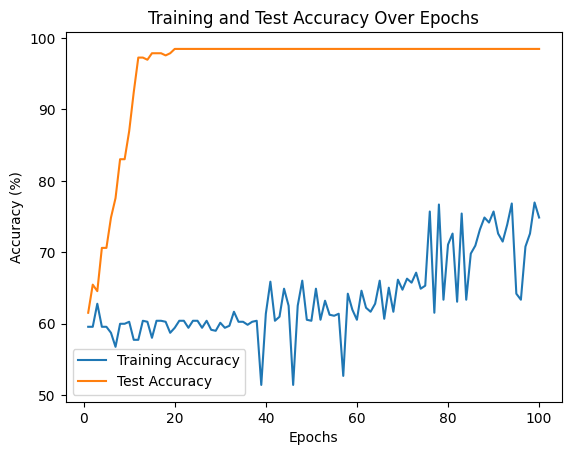


Final Training Accuracy = 74.86%
Test Accuracy = 98.48%


In [93]:
epoch = 100
lr = 0.1
random_seed = 42 

input_size = x_train.shape[1]
perceptron = SingleLayerPerceptron(input_size, lr, epoch, random_seed)
perceptron.train(x_train, y_train, X_test_normalized, y_test)

In [94]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1]


### Use (lr 0.0001) [not used]

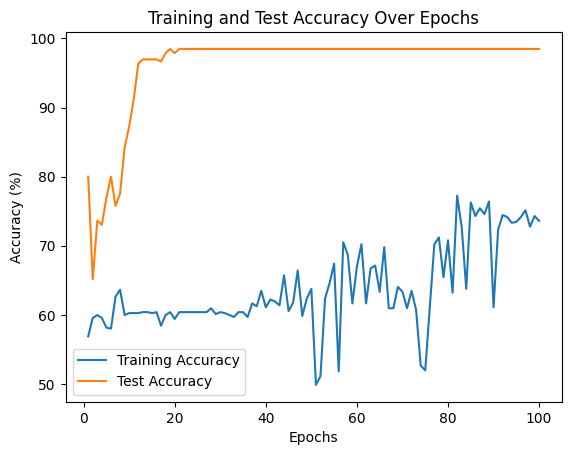


Final Training Accuracy = 73.60%
Test Accuracy = 98.48%


In [95]:
epoch = 100
lr = 0.0001
random_seed = 42

input_size = x_train.shape[1]
perceptron = SingleLayerPerceptron(input_size, lr, epoch)
perceptron.train(x_train, y_train, X_test_normalized, y_test)

### Use data v2 (lr 0.1)

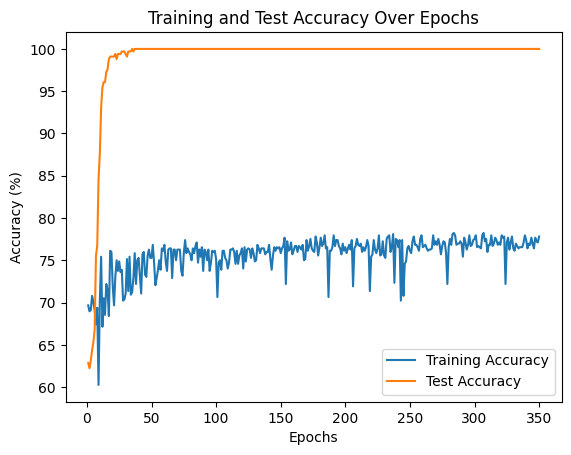


Final Training Accuracy = 77.81%
Test Accuracy = 100.00%


In [96]:
epoch = 350
lr = 0.1
random_seed = 42

input_size = x_train_v2.shape[1]
perceptron = SingleLayerPerceptron(input_size, lr, epoch, random_seed)
perceptron.train(x_train_v2, y_train_v2, X_test_normalized_v2, y_test_v2)

In [97]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1]


### Use data v2 (lr 0.01)

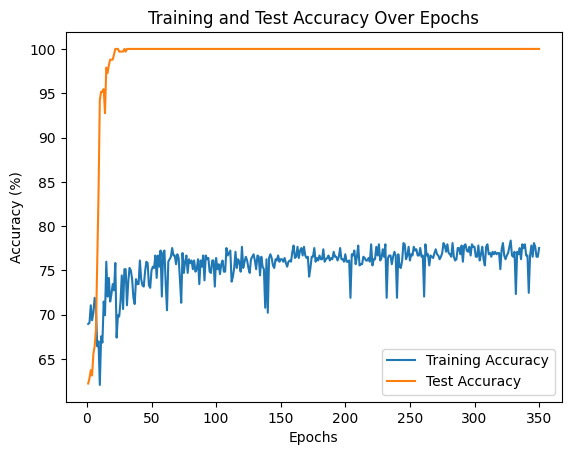


Final Training Accuracy = 77.53%
Test Accuracy = 100.00%


In [98]:
epoch = 350
lr = 0.01
random_seed = 42

input_size = x_train_v2.shape[1]
perceptron = SingleLayerPerceptron(input_size, lr, epoch, random_seed)
perceptron.train(x_train_v2, y_train_v2, X_test_normalized_v2, y_test_v2)

In [99]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1]


### Use data v2 (lr 0.001)

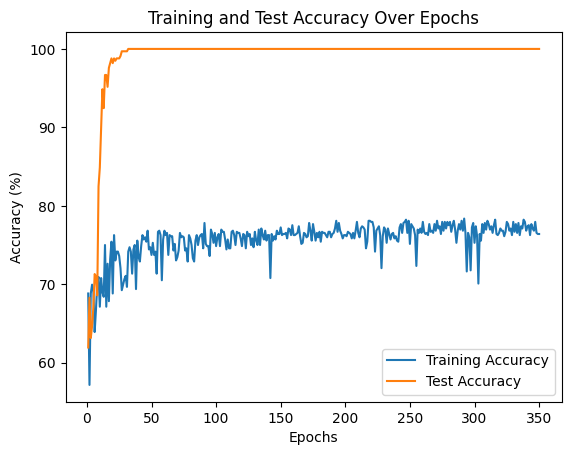


Final Training Accuracy = 76.40%
Test Accuracy = 100.00%


In [100]:
epoch = 350
lr = 0.001
random_seed = 42

input_size = x_train_v2.shape[1]
perceptron = SingleLayerPerceptron(input_size, lr, epoch, random_seed)
perceptron.train(x_train_v2, y_train_v2, X_test_normalized_v2, y_test_v2)

In [101]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1]


### Use data v2 (lr 0.0001)

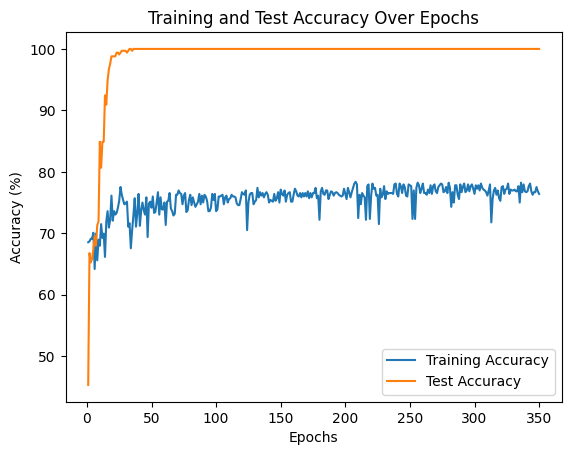


Final Training Accuracy = 76.40%
Test Accuracy = 100.00%


In [102]:
epoch = 350
lr = 0.0001
random_seed = 42

input_size = x_train_v2.shape[1]
perceptron = SingleLayerPerceptron(input_size, lr, epoch, random_seed)
perceptron.train(x_train_v2, y_train_v2, X_test_normalized_v2, y_test_v2)

In [103]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1]


### Use data v2 (lr 0.00001)

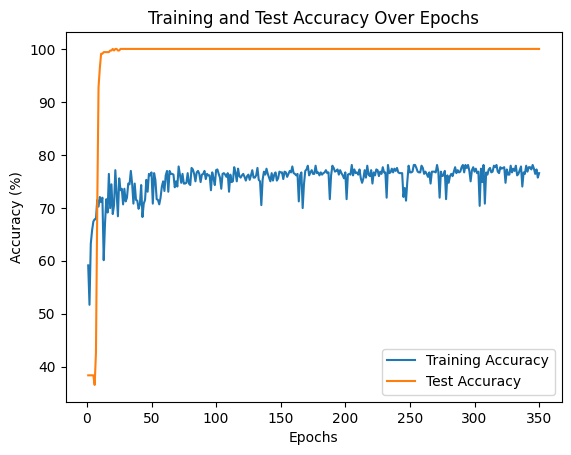


Final Training Accuracy = 76.54%
Test Accuracy = 100.00%


In [104]:
epoch = 350
lr = 0.00001
random_seed = 42

input_size = x_train_v2.shape[1]
perceptron = SingleLayerPerceptron(input_size, lr, epoch, random_seed)
perceptron.train(x_train_v2, y_train_v2, X_test_normalized_v2, y_test_v2)

In [105]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1]


# Model 2 Sigmoid Func

### Function 2

In [171]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate, epochs, random_seed=None):
        if random_seed is not None:
            np.random.seed(random_seed)

        self.weights = np.random.rand(input_size + 1) * 0.01  # Small random initialization
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _sigmoid(self, x):
        if x >= 0:
            return round(1 / (1 + np.exp(-x)), 2)
        else:
            exp_x = np.exp(x)
            return round(exp_x / (1 + exp_x), 2)

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._sigmoid(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean((predictions >= 0.5) == y)
        return accuracy * 100

    def train(self, X_train, y_train, X_test, y_test):
        training_accuracies = []
        test_accuracies = []

        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)
                error = label - prediction

                # Update weights
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            training_accuracies.append(training_accuracy)

            # Calculate test accuracy at each epoch
            test_accuracy = self._calculate_accuracy(X_test, y_test)
            test_accuracies.append(test_accuracy)

        # Plotting
        epochs_range = range(1, self.epochs + 1)
        plt.plot(epochs_range, training_accuracies, label='Training Accuracy')
        plt.plot(epochs_range, test_accuracies, label='Test Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (%)')
        plt.title('Training and Test Accuracy Over Epochs')
        plt.legend()
        plt.show()

        # Print final training accuracy
        final_training_accuracy = self._calculate_accuracy(X_train, y_train)
        print(f"\nFinal Training Accuracy = {final_training_accuracy:.2f}%")

        # Print test accuracy
        test_accuracy = self._calculate_accuracy(X_test, y_test)
        print(f"Test Accuracy = {test_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)

### Use 1 (lr 0.1) [not used]

In [172]:
# train_dataset = [list(x_train[i]) + [y_train[i]] for i in range(len(x_train))]

# # Combine X_test and y_test into a test dataset
# test_dataset = [list(X_test_normalized[i]) + [y_test[i]] for i in range(len(X_test_normalized))]

# # Set the learning rate and number of epochs
# learning_rate = 0.1
# epochs = 100

# # # Example: Using the perceptron algorithm without cross-validation
# accuracy_train, accuracy_test = evaluate_algorithm(train_dataset, test_dataset, perceptron, learning_rate, epochs)

# # # Print the accuracy scores
# print(f'Training Accuracy: {accuracy_train:.2f}%')
# print(f'Testing Accuracy: {accuracy_test:.2f}%')

### Use 1 (lr 0.0001) [not used]

In [173]:
# train_dataset = [list(x_train[i]) + [y_train[i]] for i in range(len(x_train))]

# # Combine X_test and y_test into a test dataset
# test_dataset = [list(X_test_normalized[i]) + [y_test[i]] for i in range(len(X_test_normalized))]

# # Set the learning rate and number of epochs
# learning_rate = 0.0001
# epochs = 100

# # # Example: Using the perceptron algorithm without cross-validation
# accuracy_train, accuracy_test = evaluate_algorithm(train_dataset, test_dataset, perceptron, learning_rate, epochs)

# # # Print the accuracy scores
# print(f'Training Accuracy: {accuracy_train:.2f}%')
# print(f'Testing Accuracy: {accuracy_test:.2f}%')

### Use 2 (lr 0.1)

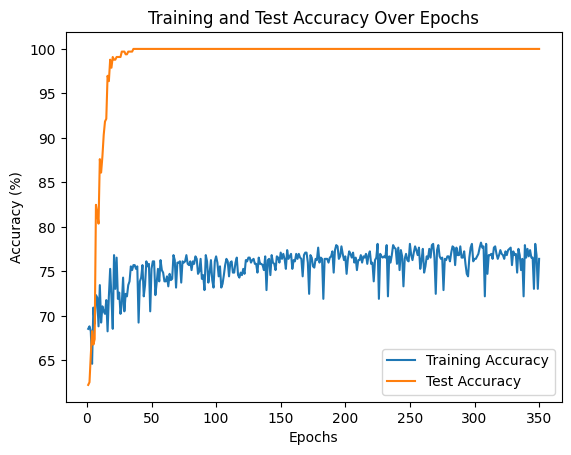


Final Training Accuracy = 76.40%
Test Accuracy = 100.00%


In [174]:
epoch = 350
lr = 0.1
random_seed = 42

input_size = x_train_v2.shape[1]
perceptron = SingleLayerPerceptron(input_size, lr, epoch, random_seed)
perceptron.train(x_train_v2, y_train_v2, X_test_normalized_v2, y_test_v2)

In [175]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.

### Use 2 (lr 0.01)

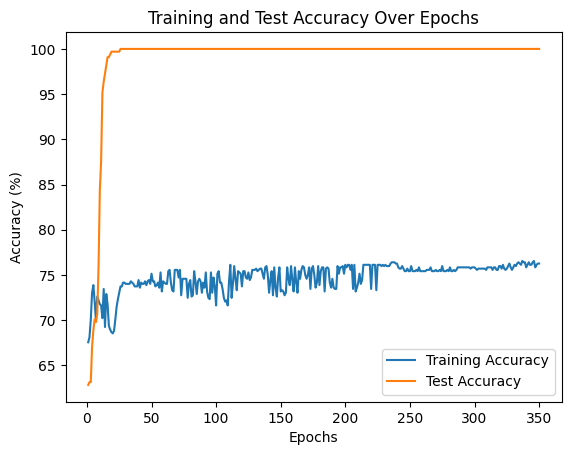


Final Training Accuracy = 76.26%
Test Accuracy = 100.00%


In [176]:
epoch = 350
lr = 0.01
random_seed = 42

input_size = x_train_v2.shape[1]
perceptron = SingleLayerPerceptron(input_size, lr, epoch, random_seed)
perceptron.train(x_train_v2, y_train_v2, X_test_normalized_v2, y_test_v2)

In [177]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0.   1.   0.   0.   1.   0.   1.   0.   1.   0.   0.   1.   0.   1.
 1.   0.   0.   1.   1.   0.   0.   0.   1.   0.   1.   0.   0.   0.
 0.   1.   0.   1.   1.   0.   0.   0.   1.   1.   0.   0.   1.   1.
 0.   0.   1.   1.   0.   0.   0.   1.   0.   0.   0.   1.   0.   1.
 0.   0.   1.   1.   0.   1.   0.   1.   0.   1.   0.   1.   0.   0.
 0.   1.   1.   0.   1.   1.   0.   0.   1.   0.   1.   0.   1.   0.
 0.   1.   0.   0.   0.   0.   1.   1.   1.   0.   1.   0.01 1.   1.
 1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
 1.   1.   0.   0.   1.   0.   0.   0.   1.   1.   0.   0.   1.   1.
 0.   1.   0.   1.   0.   1.   0.01 0.   1.   0.   0.   0.   1.   1.
 0.   1.   1.   0.   0.   1.   1.   0.   1.   0.   0.   0.   0.   0.
 0.   0.   0.   1.   0.   0.   0.   1.   0.   1.   0.   1.   0.   0.
 0.   1.   1.   0.   0.   1.   1.   0.   1.   0.   1.   0.   0.   0.
 0.   1.   0.   0.   0.   0.   0.   1.   1.   1.   1.   0.   0.   1.
 0.   1.   1.   0.   0.   0.   0. 

### Use 2 (lr 0.001)

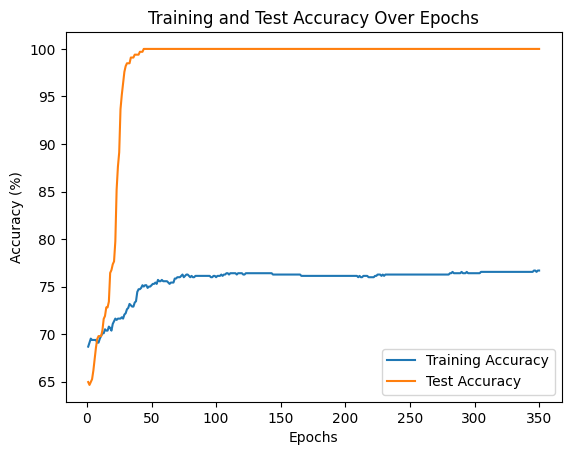


Final Training Accuracy = 76.69%
Test Accuracy = 100.00%


In [178]:
epoch = 350
lr = 0.001
random_seed = 42

input_size = x_train_v2.shape[1]
perceptron = SingleLayerPerceptron(input_size, lr, epoch, random_seed)
perceptron.train(x_train_v2, y_train_v2, X_test_normalized_v2, y_test_v2)

In [179]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0.24 0.89 0.25 0.22 0.88 0.22 0.91 0.21 0.92 0.19 0.24 0.91 0.21 0.9
 0.92 0.25 0.27 0.89 0.9  0.27 0.21 0.3  0.91 0.2  0.93 0.27 0.24 0.22
 0.2  0.88 0.28 0.9  0.9  0.22 0.26 0.22 0.9  0.9  0.22 0.29 0.93 0.88
 0.23 0.28 0.9  0.88 0.18 0.22 0.22 0.93 0.22 0.23 0.22 0.91 0.24 0.91
 0.24 0.3  0.88 0.91 0.22 0.9  0.3  0.93 0.3  0.89 0.23 0.91 0.24 0.22
 0.24 0.91 0.9  0.21 0.89 0.89 0.3  0.22 0.9  0.22 0.9  0.22 0.92 0.22
 0.22 0.89 0.22 0.25 0.23 0.28 0.93 0.91 0.9  0.25 0.88 0.31 0.9  0.9
 0.92 0.22 0.89 0.22 0.23 0.22 0.22 0.29 0.22 0.22 0.27 0.23 0.9  0.15
 0.84 0.91 0.24 0.23 0.91 0.18 0.22 0.21 0.93 0.89 0.16 0.22 0.91 0.9
 0.24 0.89 0.24 0.9  0.23 0.88 0.3  0.18 0.9  0.27 0.21 0.16 0.89 0.9
 0.28 0.89 0.92 0.23 0.28 0.9  0.92 0.23 0.9  0.19 0.23 0.22 0.2  0.25
 0.22 0.22 0.28 0.9  0.23 0.2  0.28 0.89 0.23 0.91 0.23 0.93 0.22 0.22
 0.24 0.89 0.84 0.24 0.22 0.92 0.92 0.22 0.9  0.22 0.93 0.22 0.22 0.23
 0.24 0.91 0.21 0.29 0.22 0.27 0.27 0.89 0.92 0.93 0.89 0.26 0.24 0.9
 0.21 0.9  

### Use 2 (lr 0.0001)

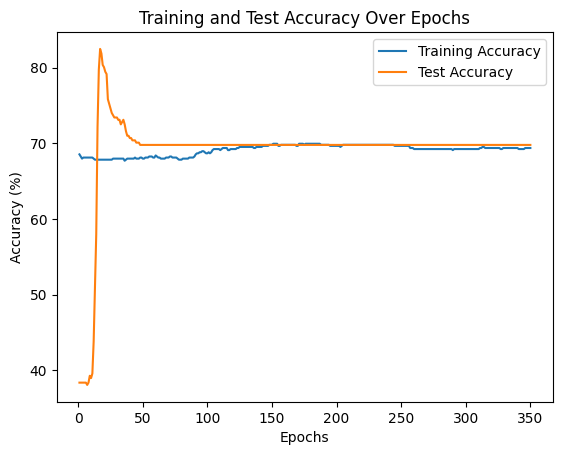


Final Training Accuracy = 69.38%
Test Accuracy = 69.79%


In [180]:
epoch = 350
lr = 0.00001
random_seed = 42

input_size = x_train_v2.shape[1]
perceptron = SingleLayerPerceptron(input_size, lr, epoch, random_seed)
perceptron.train(x_train_v2, y_train_v2, X_test_normalized_v2, y_test_v2)

In [181]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0.4  0.44 0.41 0.39 0.44 0.39 0.46 0.4  0.47 0.38 0.42 0.48 0.4  0.48
 0.48 0.41 0.41 0.44 0.45 0.44 0.39 0.45 0.5  0.38 0.51 0.41 0.42 0.4
 0.4  0.44 0.44 0.45 0.45 0.39 0.41 0.39 0.46 0.48 0.39 0.44 0.51 0.44
 0.42 0.43 0.46 0.47 0.39 0.39 0.39 0.5  0.39 0.4  0.39 0.46 0.44 0.46
 0.42 0.44 0.48 0.46 0.39 0.44 0.44 0.5  0.44 0.47 0.4  0.46 0.41 0.42
 0.42 0.46 0.45 0.4  0.44 0.48 0.44 0.39 0.48 0.39 0.45 0.39 0.5  0.4
 0.39 0.44 0.39 0.4  0.4  0.43 0.5  0.46 0.48 0.41 0.44 0.45 0.46 0.46
 0.5  0.39 0.45 0.39 0.4  0.39 0.39 0.44 0.39 0.39 0.41 0.4  0.45 0.39
 0.43 0.48 0.44 0.4  0.48 0.38 0.39 0.4  0.51 0.45 0.38 0.39 0.48 0.45
 0.42 0.45 0.41 0.46 0.4  0.44 0.44 0.38 0.45 0.41 0.38 0.39 0.46 0.46
 0.44 0.46 0.51 0.4  0.44 0.48 0.5  0.4  0.46 0.38 0.4  0.4  0.38 0.41
 0.4  0.39 0.45 0.45 0.4  0.39 0.44 0.46 0.4  0.46 0.4  0.5  0.39 0.39
 0.4  0.46 0.43 0.42 0.42 0.5  0.48 0.39 0.46 0.39 0.5  0.39 0.39 0.4
 0.4  0.48 0.38 0.44 0.39 0.44 0.41 0.46 0.5  0.5  0.46 0.44 0.42 0.46
 0.4  0.4

### Use 2 (lr 0.00001)

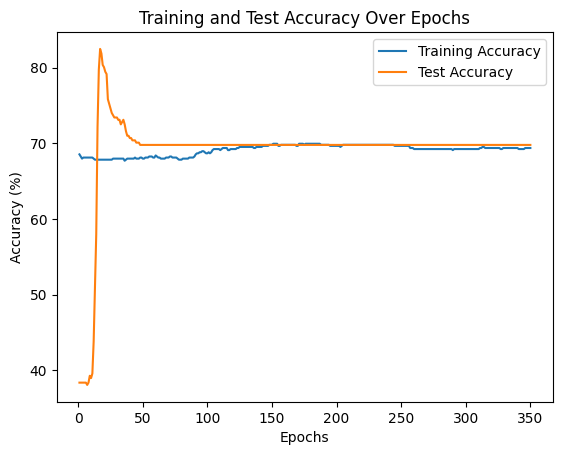


Final Training Accuracy = 69.38%
Test Accuracy = 69.79%


In [182]:
epoch = 350
lr = 0.00001
random_seed = 42

input_size = x_train_v2.shape[1]
perceptron = SingleLayerPerceptron(input_size, lr, epoch, random_seed)
perceptron.train(x_train_v2, y_train_v2, X_test_normalized_v2, y_test_v2)

In [183]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0.4  0.44 0.41 0.39 0.44 0.39 0.46 0.4  0.47 0.38 0.42 0.48 0.4  0.48
 0.48 0.41 0.41 0.44 0.45 0.44 0.39 0.45 0.5  0.38 0.51 0.41 0.42 0.4
 0.4  0.44 0.44 0.45 0.45 0.39 0.41 0.39 0.46 0.48 0.39 0.44 0.51 0.44
 0.42 0.43 0.46 0.47 0.39 0.39 0.39 0.5  0.39 0.4  0.39 0.46 0.44 0.46
 0.42 0.44 0.48 0.46 0.39 0.44 0.44 0.5  0.44 0.47 0.4  0.46 0.41 0.42
 0.42 0.46 0.45 0.4  0.44 0.48 0.44 0.39 0.48 0.39 0.45 0.39 0.5  0.4
 0.39 0.44 0.39 0.4  0.4  0.43 0.5  0.46 0.48 0.41 0.44 0.45 0.46 0.46
 0.5  0.39 0.45 0.39 0.4  0.39 0.39 0.44 0.39 0.39 0.41 0.4  0.45 0.39
 0.43 0.48 0.44 0.4  0.48 0.38 0.39 0.4  0.51 0.45 0.38 0.39 0.48 0.45
 0.42 0.45 0.41 0.46 0.4  0.44 0.44 0.38 0.45 0.41 0.38 0.39 0.46 0.46
 0.44 0.46 0.51 0.4  0.44 0.48 0.5  0.4  0.46 0.38 0.4  0.4  0.38 0.41
 0.4  0.39 0.45 0.45 0.4  0.39 0.44 0.46 0.4  0.46 0.4  0.5  0.39 0.39
 0.4  0.46 0.43 0.42 0.42 0.5  0.48 0.39 0.46 0.39 0.5  0.39 0.39 0.4
 0.4  0.48 0.38 0.44 0.39 0.44 0.41 0.46 0.5  0.5  0.46 0.44 0.42 0.46
 0.4  0.4

# Notes

i have SLP model using step function, and i was experimenting with learning rate. 

    lr=0.1
    Final Training Accuracy = 77.81%
    Test Accuracy = 100.00%

    lr=0.01
    Final Training Accuracy = 77.53%
    Test Accuracy = 100.00%

    lr=0.001
    Final Training Accuracy = 76.40%
    Test Accuracy = 100.00%

    lr=0.0001
    Final Training Accuracy = 76.40%
    Test Accuracy = 100.00%

    lr=0.00001
    Final Training Accuracy = 76.54%
    Test Accuracy = 100.00%

how could you explain that? i need to explain it on presentation tomorrow, and i was wonder the explanation


The learning rate in a machine learning model determines the size of the steps taken during the optimization process. It plays a crucial role in the convergence of the model during training. Let's analyze the results:

    Higher Learning Rates (0.1, 0.01):
        Both cases resulted in similar training accuracies around 77-78%, suggesting that the model might be taking large steps during optimization.
        However, the slightly lower accuracy with a learning rate of 0.01 indicates that it might have been too large, causing the model to overshoot the optimal values.

    Moderate Learning Rates (0.001, 0.0001):
        The training accuracies are slightly lower, indicating that the model may be converging more slowly. This is expected with lower learning rates as smaller steps are taken during optimization.
        The fact that both 0.001 and 0.0001 have similar results suggests that the model might not benefit significantly from further reducing the learning rate.

    Very Low Learning Rate (0.00001):
        The training accuracy is slightly higher than with 0.001 and 0.0001, but not as high as with 0.1 or 0.01.
        This could imply that the learning rate is too small, causing the model to converge very slowly or get stuck in a local minimum.

In summary, the optimal learning rate seems to be in the moderate range (0.001 to 0.0001) for this specific model and dataset. Too high a learning rate leads to overshooting, while too low a learning rate results in slow convergence. It's crucial to strike a balance to achieve better training performance. You might also visualize the loss curves during training to gain more insights into how the model is learning with different learning rates.

    Learning Rate (Tingkat Pembelajaran):
        Menentukan seberapa besar langkah yang diambil selama proses optimasi.

    Higher Learning Rates (Tingkat Pembelajaran Tinggi):
        Langkah-langkah besar dapat mengakibatkan overshooting, diindikasikan oleh akurasi pelatihan yang tinggi tetapi mungkin tidak optimal.

    Moderate Learning Rates (Tingkat Pembelajaran Sedang):
        Langkah-langkah lebih kecil dapat menghasilkan konvergensi yang lebih lambat, ditunjukkan oleh akurasi pelatihan yang sedikit lebih rendah.

    Very Low Learning Rate (Tingkat Pembelajaran Sangat Rendah):
        Langkah-langkah terlalu kecil dapat menyebabkan konvergensi yang sangat lambat atau terjebak dalam minimum lokal.

    Optimal Learning Rate (Tingkat Pembelajaran Optimal):
        Keseimbangan antara langkah-langkah besar dan kecil untuk mencapai kinerja pelatihan yang lebih baik.

    Loss Curve (Kurva Kerugian):
        Visualisasi dari bagaimana model belajar selama pelatihan, dapat memberikan wawasan tambahan.

    Convergence (Konvergensi):
        Proses di mana model mencapai nilai optimal selama pelatihan.

    Overshooting (Overshooting):
        Keadaan di mana model melewati nilai optimal selama proses optimasi.

    Local Minimum (Minimum Lokal):
        Titik di mana fungsi kerugian mencapai nilai minimum, tetapi mungkin bukan minimum global.

Dengan mengingat kata-kata kunci ini, Anda dapat memberikan penjelasan yang baik tentang pengaruh tingkat pembelajaran pada model SLP Anda.